Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period , identify which factors predict future user adoption .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
user_engagement_df = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])

In [3]:
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [5]:
# can't to read takehome_users.csv using standared encoding format, we need to find the encoding format
with open("takehome_users.csv") as f:
    print(f.encoding)

cp1252


In [6]:
users_df = pd.read_csv("takehome_users.csv", parse_dates=["creation_time", "last_session_creation_time"], encoding="cp1252")

In [7]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [8]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
# we need to convert invited_by_user_id to int and replace null values
users_df['invited_by_user_id'] = users_df["invited_by_user_id"].fillna(0).astype(int)

In [10]:
# Creating new colum to store only date value
user_engagement_df['date'] = user_engagement_df['time_stamp'].dt.date
user_engagement_df.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


<AxesSubplot:title={'center':'Activity per Day'}, xlabel='date'>

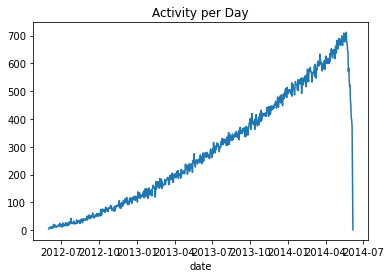

In [11]:
# With newely created column we can check trend of user
user_engagement_df.groupby(['date'])['user_id'].count().plot(title="Activity per Day")

<AxesSubplot:title={'center':'Activity Last 30 Dates'}, xlabel='date'>

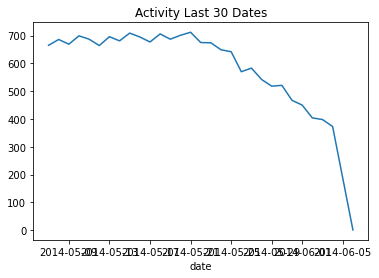

In [12]:
# There seems to be drop in last few dates
user_engagement_df.groupby(['date'])['user_id'].count().tail(30).plot(title="Activity Last 30 Dates")

In [14]:
user_engagement_df.tail(2)

,time_stamp,user_id,visited,date
207915,2012-06-02 11:55:59,11999,1,2012-06-02
207916,2014-01-26 08:57:12,12000,1,2014-01-26


In [15]:
# Last day index
user_engagement_df[user_engagement_df['time_stamp'] >= '2014-06-06']

,time_stamp,user_id,visited,date
70763,2014-06-06 14:58:50,4051,1,2014-06-06


In [16]:
# Drop last day data which have only one user visited
user_engagement_df.drop(user_engagement_df.index[70763], inplace=True)

In [17]:
# Count user visits
user_visit_count = user_engagement_df.groupby(['user_id'])['visited'].sum().to_frame()

In [18]:
# Count user visits max 20 
user_visit_count[user_visit_count["visited"] <= 20].groupby(['visited'])['visited'].count()

visited
1     6234
2      340
3      241
4      181
5      110
6       85
7       68
8       57
9       48
10      34
11      26
12      29
13      29
14      30
15      13
16      20
17      18
18      18
19      12
20      16
Name: visited, dtype: int64

In [19]:
print("Precentage of users who logged in once: "+"{:.1%}".format(6234/12000))

Precentage of users who logged in once: 51.9%


In [20]:
print("Precentage of users who never logged in: "+"{:.1%}".format(1-len(user_visit_count) / len(users_df)))

Precentage of users who never logged in: 26.5%


In [21]:
print("Precentage of user invited: "+"{:.1%}".format(6417/12000))

Precentage of user invited: 53.5%


<AxesSubplot:title={'center':'Creation Source Count'}, xlabel='creation_source'>

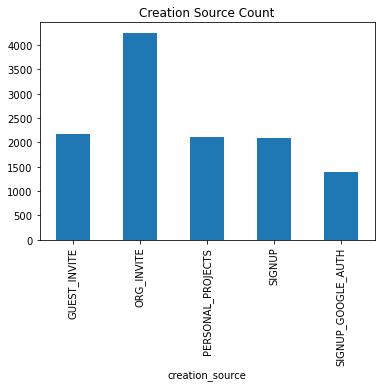

In [24]:
users_df.groupby(['creation_source'])['creation_source'].count().plot(kind="bar", title="Creation Source Count")

In [25]:
# Weekly visit counts by user
engagement_weekly = user_engagement_df.groupby([pd.Grouper(key='time_stamp', freq='W'), 'user_id']).visited.sum().to_frame()
engagement_weekly.reset_index(inplace=True)
engagement_weekly.head()

,time_stamp,user_id,visited
0,2012-06-03,563,1
1,2012-06-03,1693,1
2,2012-06-03,1995,1
3,2012-06-03,2120,1
4,2012-06-03,2136,1


In [26]:
engagement_weekly.user_id[engagement_weekly.visited >= 3].nunique()

1445

In [27]:
# Three or more visits within a week
active_users = engagement_weekly[engagement_weekly.visited >= 3].groupby(['user_id'])['visited'].sum().to_frame()

In [28]:
active_users['adopted'] = 1
active_users.head()

,visited,adopted
user_id,,
2,3,1
10,249,1
20,3,1
33,3,1
42,331,1


In [29]:
# Binary column for invited_by_user_id
users_df['invited']= users_df['invited_by_user_id'].apply(lambda x: 0 if x == 0 else 1)

In [30]:
# Add visit count by user
users_df = users_df.join(user_visit_count)
# Fill null value and , convert data type
users_df["last_session_creation_time"] = users_df["last_session_creation_time"].fillna(0)
users_df["visited"] = users_df["visited"].fillna(0).astype(int)
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525,1,14
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151,1,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240,1,1


In [31]:
# Add target - adopted
users_df = users_df.join(active_users["adopted"])
users_df["adopted"] = users_df["adopted"].fillna(0).astype(int)

In [32]:
# Add email domain
users_df['domain'] = users_df['email'].apply(lambda x: x.split('@')[1])
users_df.domain.nunique()

1184

In [33]:
users_df.domain.value_counts().head(10)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
dqwln.com            2
rerwl.com            2
xvnbr.com            2
xybhi.com            2
Name: domain, dtype: int64

In [34]:
# Onl first 6 seems to have more data so we can name all other as oters domain
list_of_domains = ["gmail.com", "yahoo.com", "jourrapide.com", "cuvox.de", "gustr.com", "hotmail.com"]
users_df['domains'] = users_df['domain'].apply(lambda x: x if x in list_of_domains else 'other')

In [35]:
# Get dummies for email domain, Creation Source
users_df = pd.get_dummies(users_df, columns=['domains'])
users_df = pd.get_dummies(users_df, columns=['creation_source'])

In [36]:
# Drop fields not used
df = users_df.drop(['creation_time', 'name', 'email', 'last_session_creation_time', 'invited_by_user_id', 'domain'], axis=1)

In [37]:
df.columns

Index(['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'org_id', 'invited', 'visited', 'adopted', 'domains_cuvox.de',
       'domains_gmail.com', 'domains_gustr.com', 'domains_hotmail.com',
       'domains_jourrapide.com', 'domains_other', 'domains_yahoo.com',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [39]:
#Logistic Regression for binary classification, Target variable = "Adopted"
# Separate X, y, train, test, validate samples
y = df.adopted
X = df.drop(['adopted'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7, stratify=y)

In [40]:
# Steps, pipeline, scale, fit
steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state = 7))]
pipeline = Pipeline(steps)
logreg_scaled = pipeline.fit(X_train, y_train)

In [41]:
# Accuracy on testing
print("The testing accuracy is "+"{:.1%}".format(logreg_scaled.score(X_test, y_test)))

The testing accuracy is 98.8%


In [42]:
# 5-fold cross-validation scores
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.98166667 0.98583333 0.98666667 0.98375    0.9775    ]
Average 5-Fold CV Score: 0.9830833333333334


In [43]:
features = list(X)

In [44]:
# Check coefficients
logreg = LogisticRegression(random_state = 7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
logreg.fit(X_train,y_train)
std_coef = logreg.coef_.reshape(-1,1).tolist()
feature_names = [feature.title() for feature in features]
coef_df = pd.DataFrame(std_coef,index=feature_names,columns=['coef'])
coef_df['abs'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs',ascending=False).drop('abs',axis=1)
pd.set_option('display.max_rows', None)
print(coef_df)

                                        coef
Invited                            -0.971187
Domains_Gmail.Com                  -0.825427
Creation_Source_Personal_Projects  -0.694901
Creation_Source_Signup             -0.600797
Creation_Source_Org_Invite         -0.540012
Opted_In_To_Mailing_List           -0.507535
Visited                             0.470411
Creation_Source_Guest_Invite       -0.431175
Domains_Yahoo.Com                  -0.422965
Enabled_For_Marketing_Drip         -0.369482
Domains_Jourrapide.Com             -0.297083
Creation_Source_Signup_Google_Auth -0.289474
Domains_Other                      -0.268923
Domains_Cuvox.De                   -0.261132
Domains_Hotmail.Com                -0.259261
Domains_Gustr.Com                  -0.221568
Org_Id                             -0.003889
Object_Id                          -0.000169


C:\Users\snad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The above list is the importance of each feature, starting from the top as the most important. 

The accuracy of the model is 98.8% and the model uses some email domains and creation sources as top features.

Specifically, user accounts created through Google_Auth or Personal Projects are most likely to become adopted users. Additional benefit comes if a new user was invited by an existing user. 
Since guest invited users, organization invited users also have high value of importance which implies users who came in by these methods tend to remain active.

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split

In [46]:
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [47]:
graboost = GradientBoostingClassifier(max_features='sqrt')
parametergra = {'n_estimators':[40,45,50,55,60],'learning_rate':[.01,0.02,0.03,0.04,0.05],
              'max_depth':[1,2,3,4,5]}
grid1 = GridSearchCV(estimator=graboost,param_grid=parametergra,
                     scoring='accuracy',cv=5)
grid1.fit(X_train,y_train)
best_para_gra = grid1.best_params_
best_acc_gra = grid1.best_score_

print('The Tuned Paratmers :\n',best_para_gra,'\nAchieved %s Percent Accuracy' %(best_acc_gra*100))

The Tuned Paratmers :
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 55} 
Achieved 98.56666666666666 Percent Accuracy


In [48]:
gbm = GradientBoostingClassifier(max_features='sqrt',
                                 n_estimators=45,learning_rate=.05,max_depth= 3)
gbm.fit(X_train,y_train)
feature_coef = pd.DataFrame(gbm.feature_importances_).transpose()
feature_coef.columns = list(X.columns)
feature_coef.index = ['GBM'] 
feature_coef.transpose().sort_values(by='GBM',ascending=False)

,GBM
visited,9.957175e-01
object_id,1.756369e-03
org_id,1.001816e-03
domains_gustr.com,2.761318e-04
creation_source_PERSONAL_PROJECTS,2.125200e-04
enabled_for_marketing_drip,2.079066e-04
domains_hotmail.com,1.981596e-04
creation_source_SIGNUP,1.476258e-04
creation_source_ORG_INVITE,1.192066e-04
creation_source_GUEST_INVITE,8.326980e-05
